In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Preprocessing
First read the housing price data set.

In [3]:
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, 
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype={'id':np.int, 'type':np.str, 'chiiki':np.str, 'jiscode':np.str, 'ken':np.str, 'shi':np.str, 'chiku':np.str, 'eki':np.str,
                       'ekikyori':np.float32, 'price':np.float32, 'unit_price':np.float32, 'madori':np.str, 'menseki':np.float32, 'unit_price2':np.float32,
                       'keijo':np.str, 'maguchi':np.str, 'nobeyuka':np.float32, 'kenchikunen':np.str, 'kouzou':np.str, 'youto':np.str, 'mokuteki':np.str,
                       'dourohoui':np.str, 'dourotype':np.str, 'douro_fukuin':np.str, 'toshikeikaku':np.str, 'kenpeiritsu':np.float32, 
                       'yousekiritsu':np.float32, 'torihiki_jiten':np.str, 'bikou':np.str})
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, index_col='id',
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype='object')

In [4]:
dat.head(3)

type chiiki jiscode  ken   shi chiku  eki ekikyori      price  \
id                                                                       
1    中古マンション等    NaN   13101  東京都  千代田区   飯田橋  飯田橋        1   51000000   
2   宅地(土地と建物)    商業地   13101  東京都  千代田区   飯田橋  飯田橋        5  300000000   
3   宅地(土地と建物)    商業地   13101  東京都  千代田区   飯田橋  飯田橋        4  170000000   

   unit_price   ...     youto mokuteki dourohoui dourotype douro_fukuin  \
id              ...                                                       
1         NaN   ...        住宅       住宅       NaN       NaN          NaN   
2         NaN   ...       その他       住宅        北東        区道          5.0   
3         NaN   ...    事務所、倉庫       住宅        北東        区道          4.0   

   toshikeikaku kenpeiritsu yousekiritsu torihiki_jiten   bikou  
id                                                               
1          商業地域          80          600     平成28年第３四半期  未改装を購入  
2          商業地域          80          500     平成28年第１四半期     NaN  
3          商業地域          80          700     平成28年第１四半期     NaN  

[3 rows x 28 columns]

In [5]:
d = dat[(dat.type=='中古マンション等') & (dat.youto=='住宅')]
d.groupby('ekikyori')['type'].count()

ekikyori
0           1127
1           5273
10          6702
11          6257
12          3538
13          3999
14          3058
15          2917
16          2184
17           620
18          1419
19          1071
1H30?2H        8
1H?1H30       81
2           7886
20           818
21           575
22           172
23           576
24           389
25           372
26           243
27            59
28           223
29           204
2H?           16
3          11317
30分?60分     1075
4          12681
5          11617
6          13151
7           9143
8          10375
9           8970
Name: type, dtype: int64

# Converting each column into the right format
We read all the variables as 'object.' We convert some columns into values where appropriate.

'ekikyori' takes integer for most records, and we can see '1H30' and '30分'. We will convert to a value

In [6]:
d.loc[d.ekikyori=='30分?60分', 'ekikyori'] = '60'
d.loc[d.ekikyori=='2H?', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H30?2H', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H?1H30', 'ekikyori'] = '90'

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernela

In [7]:
d.ekikyori = pd.to_numeric(d.ekikyori)
d.menseki = pd.to_numeric(d.menseki)
d.kenpeiritsu = pd.to_numeric(d.kenpeiritsu)/100.0
d.yousekiritsu = pd.to_numeric(d.yousekiritsu)/100.0

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
d.price = pd.to_numeric(d.price)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
d.iloc[:3, 25:30]

yousekiritsu torihiki_jiten   bikou
id                                     
1            6.0     平成28年第３四半期  未改装を購入
4            5.0     平成28年第１四半期  未改装を購入
5            7.0     平成28年第１四半期  未改装を購入

In [10]:
d.groupby('bikou')['type'].count()
# remove
# unit_price
# unit_price2
# keijo
# maguchi
# nobeyuka
# dourohoui
# dourotype
# douro_fukuin

bikou
その他事情有り                        1
他の権利・負担付き                      1
他の権利・負担付き、改装済を購入               4
他の権利・負担付き、未改装を購入              15
他の権利・負担付き、調停・競売等、未改装を購入        1
改装済を購入                     32550
改装済を購入、その他事情有り                 4
未改装を購入                     88887
未改装を購入、その他事情有り                22
瑕疵有りの可能性、改装済を購入                3
瑕疵有りの可能性、未改装を購入                6
調停・競売等                       457
調停・競売等、改装済を購入                101
調停・競売等、未改装を購入               2479
関係者間取引                        14
関係者間取引、改装済を購入                 31
関係者間取引、未改装を購入                191
Name: type, dtype: int64

From 'bikou' column, we can find if the apartment was reformed or not, the transaction between two professional dealers.

In [11]:
d['is_reformed'] = [1 if x in (['他の権利・負担付き、改装済を購入','改装済を購入','改装済を購入、その他事情有り',
                               '瑕疵有りの可能性、改装済を購入','調停・競売等、改装済を購入','関係者間取引、改装済を購入']) else 0 for x in d.bikou]
d['is_not_reformed'] = [1 if x in (['他の権利・負担付き、未改装を購入','他の権利・負担付き、調停・競売等、未改装を購入','未改装を購入',
                               '未改装を購入、その他事情有り','瑕疵有りの可能性、未改装を購入','調停・競売等、未改装を購入',
                                   '関係者間取引、未改装を購入']) else 0 for x in d.bikou]
d['is_auction'] = [1 if x in ['調停・競売等','調停・競売等、改装済を購入','調停・競売等、未改装を購入'] else 0 for x in d.bikou]
d['is_direct_transaction'] = [1 if x in ['関係者間取引','関係者間取引、改装済を購入','関係者間取引、未改装を購入'] else 0 for x in d.bikou]


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

We need to convert 'torihiki_jiten' (transaction date) and 'kenchikunen' (year of built). These are denoted by gengou.

In [12]:
print(d.groupby('kenchikunen')['type'].count())

kenchikunen
平成10年    4510
平成11年    4523
平成12年    5419
平成13年    4607
平成14年    5124
平成15年    5874
平成16年    5733
平成17年    6856
平成18年    6592
平成19年    5593
平成20年    5138
平成21年    4469
平成22年    2840
平成23年    1867
平成24年    2009
平成25年    1290
平成26年    1110
平成27年    1091
平成28年     147
平成2年     2299
平成3年     2924
平成4年     2330
平成5年     1339
平成6年     1909
平成7年     3145
平成8年     3341
平成9年     3565
平成元年     2242
戦前        123
昭和21年       5
         ... 
昭和34年      14
昭和35年       4
昭和36年      10
昭和37年      10
昭和38年      26
昭和39年      63
昭和40年      76
昭和41年     146
昭和42年     170
昭和43年     474
昭和44年     690
昭和45年    1204
昭和46年    1495
昭和47年    1307
昭和48年    1323
昭和49年    1666
昭和50年     824
昭和51年    1002
昭和52年    1013
昭和53年    1734
昭和54年    1983
昭和55年    1805
昭和56年    1465
昭和57年    1692
昭和58年    1649
昭和59年    3426
昭和60年    2728
昭和61年    2221
昭和62年    2452
昭和63年    2665
Name: type, dtype: int64


We make a list of years manually.

In [13]:
gengou = []
gengou.append("戦前")
shouwa = range(21, 64)
for yr in shouwa:
    gengou.append("昭和"+np.str(yr)+"年")
# 平成元年
gengou.append("平成元年")
# 平成２年以降
heisei = range(2, 30)
for yr in heisei:
    gengou.append("平成"+np.str(yr)+"年")
seireki = range(1945, 2018) 
kenchikunen = {k: v for k, v in zip(gengou, seireki)}
# {平成２８年: 2016, 昭和５４年: 1979, ...}


We now change the kenchikunen in the data set. But kenchikunen has 3025 null values, so we need to delete those records.

In [14]:
d.isnull().sum()

type                          0
chiiki                   136394
jiscode                       0
ken                           0
shi                           0
chiku                        44
eki                         283
ekikyori                   8278
price                         0
unit_price               136394
madori                     4034
menseki                       0
unit_price2              136394
keijo                    136394
maguchi                  136394
nobeyuka                 136394
kenchikunen                3025
kouzou                     1033
youto                         0
mokuteki                 102656
dourohoui                136394
dourotype                136394
douro_fukuin             136394
toshikeikaku               2441
kenpeiritsu                2986
yousekiritsu               2986
torihiki_jiten                0
bikou                     11627
is_reformed                   0
is_not_reformed               0
is_auction                    0
is_direc

In [15]:
d['kenchiku_year'] = [np.nan if pd.isnull(y) else kenchikunen[y] for y in d.kenchikunen]
d[['kenchikunen', 'kenchiku_year']].head(5)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


kenchikunen  kenchiku_year
id                           
1        昭和59年         1984.0
4        平成19年         2007.0
5        昭和57年         1982.0
6        平成19年         2007.0
10       平成11年         1999.0

From the kenchiku_year, we can calculate the age of the apartment as of the transaction date. The transaction quarter is available in the data set, so we take the difference between the two years.

In [16]:
d['transaction_year'] = [kenchikunen[v[:5]] for v in d.torihiki_jiten]
d[['torihiki_jiten', 'transaction_year']].head(5)
#for x in d.torihiki_jiten[:10]:
#    print(x[:5], kenchikunen[x[:5]])

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


torihiki_jiten  transaction_year
id                                 
1      平成28年第３四半期              2016
4      平成28年第１四半期              2016
5      平成28年第１四半期              2016
6      平成28年第１四半期              2016
10     平成27年第４四半期              2015

In [17]:
d['age'] = np.maximum(d.transaction_year - d.kenchiku_year, 0)
print(d.age[:20])

id
1     32.0
4      9.0
5     34.0
6      9.0
10    16.0
11    31.0
12    33.0
13     8.0
14    31.0
16    31.0
17     8.0
18    30.0
19     NaN
20     2.0
21    31.0
22    11.0
23     7.0
24     7.0
25    11.0
26    30.0
Name: age, dtype: float64


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


The price can take a large value, ranging from one million yen. We take the log of the price.

In [18]:
d['price_log10'] = np.log10(d.price)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We now save the data set into pickle so we can re-start easily.

In [19]:
# remove useless columns
d.isnull().sum()/d.shape[0] # ratio of null values
# chiiki, unit_price, unit_price2, keijo, maguchi, nobeyuka, dourohoui, dourotype, douro_fukuin are all NaN
d = d.drop(['chiiki','unit_price','unit_price2','keijo','maguchi','nobeyuka','dourohoui','dourotype','douro_fukuin'], axis=1)

In [20]:
d.head(3)
# type is all apartment, and ken is Tokyo. so we remove these too.
d = d.drop(['type','ken'], axis=1)

We are going to use one year of records as the training data set, the next one quarter as the validation and the next one quarter as the test data set.

The dataset includes null values. We count the number of blank records for each column.

In [21]:
d[d.transaction_year>=2015].isnull().sum()

jiscode                     0
shi                         0
chiku                       0
eki                         2
ekikyori                   47
price                       0
madori                   1062
menseki                     0
kenchikunen               751
kouzou                     90
youto                       0
mokuteki                 1232
toshikeikaku              196
kenpeiritsu               268
yousekiritsu              268
torihiki_jiten              0
bikou                    3131
is_reformed                 0
is_not_reformed             0
is_auction                  0
is_direct_transaction       0
kenchiku_year             751
transaction_year            0
age                       751
price_log10                 0
dtype: int64

In [22]:
# remove rows that have NA values in at least one column.
d_comp = d.dropna(axis=0)
print("deleted records: ", d.shape[0] - d_comp.shape[0])
d[['mokuteki','toshikeikaku','youto','kenpeiritsu','yousekiritsu']].head(5)

deleted records:  108731


mokuteki toshikeikaku youto  kenpeiritsu  yousekiritsu
id                                                       
1        住宅         商業地域    住宅          0.8           6.0
4        住宅         商業地域    住宅          0.8           5.0
5       事務所         商業地域    住宅          0.8           7.0
6        住宅         商業地域    住宅          0.8           5.0
10       住宅         商業地域    住宅          0.8           5.0

In [23]:
print(d_comp.groupby('torihiki_jiten')['shi'].count())
train = d_comp[d_comp.torihiki_jiten.isin( ['平成27年第２四半期', '平成27年第３四半期','平成27年第４四半期','平成28年第１四半期'])]
validation = d_comp[d_comp.torihiki_jiten=='平成28年第２四半期']
test = d_comp[d_comp.torihiki_jiten=='平成28年第３四半期']
print(train.shape, validation.shape, test.shape)

torihiki_jiten
平成25年第１四半期       7
平成25年第２四半期       5
平成25年第３四半期      20
平成25年第４四半期      39
平成26年第１四半期     560
平成26年第２四半期    2511
平成26年第３四半期    2617
平成26年第４四半期    2716
平成27年第１四半期    2934
平成27年第２四半期    2865
平成27年第３四半期    2846
平成27年第４四半期    2825
平成28年第１四半期    2943
平成28年第２四半期    2895
平成28年第３四半期    1880
Name: shi, dtype: int64
(11479, 25) (2895, 25) (1880, 25)


## Dummy variables
We need to convert character variables by one-hot encoding. First check what variables need to be converted.
* shi
* chiku
* eki
* madori
* kenchikunen
* kouzou
* youto
* mokuteki
* toshikeikaku
* bikou
Kenchikunen is already conveted to age variable. bikou is converted into is_reformed, is_direct_sales and is_aucition. The rest of the variables 

In [89]:
d[['shi','chiku','eki','madori','kenchikunen','kouzou','youto','mokuteki','toshikeikaku','bikou']].head(10)

shi chiku  eki madori kenchikunen kouzou youto mokuteki toshikeikaku  \
id                                                                          
1   千代田区   飯田橋  飯田橋   ２ＬＤＫ       昭和59年    ＳＲＣ    住宅       住宅         商業地域   
4   千代田区   飯田橋  飯田橋   ２ＬＤＫ       平成19年     ＲＣ    住宅       住宅         商業地域   
5   千代田区   飯田橋  飯田橋     １Ｋ       昭和57年    ＳＲＣ    住宅      事務所         商業地域   
6   千代田区   飯田橋  飯田橋   ３ＬＤＫ       平成19年     ＲＣ    住宅       住宅         商業地域   
10  千代田区   飯田橋  飯田橋    １ＤＫ       平成11年    ＳＲＣ    住宅       住宅         商業地域   
11  千代田区   飯田橋  飯田橋    NaN       昭和59年    ＳＲＣ    住宅       住宅         商業地域   
12  千代田区   飯田橋  飯田橋    ２ＤＫ       昭和57年    ＳＲＣ    住宅       住宅         商業地域   
13  千代田区   飯田橋  飯田橋   １ＬＤＫ       平成19年     ＲＣ    住宅       住宅         商業地域   
14  千代田区   飯田橋  飯田橋   ２ＬＤＫ       昭和59年    ＳＲＣ    住宅       住宅         商業地域   
16  千代田区   飯田橋  飯田橋   ３ＬＤＫ       昭和59年    ＳＲＣ    住宅       住宅         商業地域   

     bikou  
id          
1   未改装を購入  
4   未改装を購入  
5   未改装を購入  
6   未改装を購入  
10  改装済を購入  
11  未改装を購入  
12  改装済を購入  
13  未改装を購入  
14  未改装を購入  
16     NaN

### Toshikeikaku
Toshikeikaku (zoning) has 10 categories. https://en.wikipedia.org/wiki/Zoning#Japan

It shows whether the area can be used for what types of building and the shape of the area.

In [101]:
d.groupby('toshikeikaku')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)

toshikeikaku  count
0           商業地域  41998
4          準工業地域  25024
6   第１種中高層住居専用地域  17447
12        近隣商業地域  17369
8        第１種住居地域  13511
11       第２種住居地域   4828
7    第１種低層住居専用地域   4738
9   第２種中高層住居専用地域   3302
3          準住居地域   2698
1           工業地域   2600
10   第２種低層住居専用地域    366
2         工業専用地域     36
5        準都市計画区域      1

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['a','b','c','d','a'])
le.classes_
le.transform(['b','b'])
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
enc.transform([[0, 1, 3]]).toarray()


array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [80]:
#print(d.groupby('madori')['torihiki_jiten'].count())
# d['bedrooms']
x=d.madori[:10].values
"""
オープンフロア      272
スタジオ          62
メゾネット          8
"""
#print(x[5])
#print(isinstance(x[5], str))
# [map(int, v[0]) for v in x]
#print(int(x[5][0]))
def numberOfRooms(madori):
    try:
        return int(madori[0])
    except TypeError:
        return 0
    except ValueError:
        return 0
numrooms = []
for x in d.madori:
    numrooms.append(numberOfRooms(x))
d['bedrooms'] = numrooms
# numberOfRooms(x[:10])
#d['bedrooms'] = [map(numberOfRooms, x) for x in d.madori]
#[map(numberOfRooms, x) for x in d.madori[:10].values]

In [86]:
d[['madori','bedrooms']].head(10)

madori  bedrooms
id                 
1    ２ＬＤＫ         2
4    ２ＬＤＫ         2
5      １Ｋ         1
6    ３ＬＤＫ         3
10    １ＤＫ         1
11    NaN         0
12    ２ＤＫ         2
13   １ＬＤＫ         1
14   ２ＬＤＫ         2
16   ３ＬＤＫ         3

In [23]:
import pickle
pickle.dump(d, open('tokyo_apartment.p', 'wb'))
pickle.dump(d_comp, open('tokyo_apartment_comp.p', 'wb'))
pickle.dump(train, open('tokyo_apartment_train.p', 'wb'))
pickle.dump(validation, open('tokyo_apartment_validation.p', 'wb'))
pickle.dump(test, open('tokyo_apartment_test.p', 'wb'))


In [24]:
d = pickle.load(open('tokyo_apartment.p', 'rb'))
d_comp = pickle.load(open('tokyo_apartment_comp.p', 'rb'))
train = pickle.load(open('tokyo_apartment_train.p', 'rb'))
validation = pickle.load(open('tokyo_apartment_validation.p', 'rb'))
test = pickle.load(open('tokyo_apartment_test.p', 'rb'))

## Visualise the data set
First, we visualise the training data set. This is to understand which factors are correlated with the price in what way, and to understand the distribution of the price and variables, which will help us decide whether we need to transform the variables.

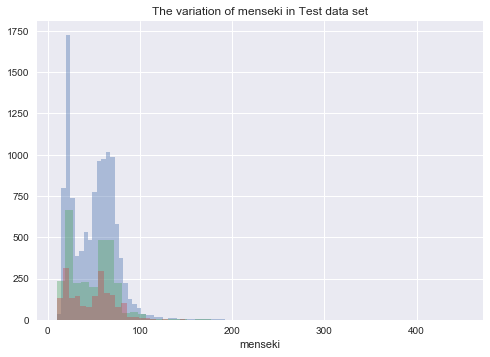

In [25]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(train.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Training data set')
sns.distplot(validation.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Validation data set')
sns.distplot(test.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Test data set')

We can observe a few outliers but menseki ranges between 0 and 400. We can check the min and maximum from tables below. The maximum is 450.

In [26]:
print('====training=====')
train.describe()


====training=====


ekikyori         price       menseki   kenpeiritsu  yousekiritsu  \
count  11479.000000  1.147900e+04  11479.000000  11479.000000  11479.000000   
mean       7.874815  3.363435e+07     48.990330      0.685129      3.482821   
std        6.664992  4.343275e+07     24.331537      0.106772      1.530995   
min        0.000000  2.400000e+05     10.000000      0.300000      0.600000   
25%        4.000000  1.800000e+07     25.000000      0.600000      2.000000   
50%        7.000000  2.700000e+07     50.000000      0.600000      3.000000   
75%       10.000000  4.000000e+07     65.000000      0.800000      5.000000   
max      120.000000  3.200000e+09    250.000000      0.800000      9.000000   

        is_reformed  is_not_reformed    is_auction  is_direct_transaction  \
count  11479.000000     11479.000000  11479.000000           11479.000000   
mean       0.267009         0.728809      0.012196               0.001133   
std        0.442417         0.444594      0.109766               0.033635   
min        0.000000         0.000000      0.000000               0.000000   
25%        0.000000         0.000000      0.000000               0.000000   
50%        0.000000         1.000000      0.000000               0.000000   
75%        1.000000         1.000000      0.000000               0.000000   
max        1.000000         1.000000      1.000000               1.000000   

       kenchiku_year  transaction_year           age   price_log10  
count    11479.00000      11479.000000  11479.000000  11479.000000  
mean      1997.43462       2015.256381     17.822023      7.424246  
std         11.99035          0.436654     11.992205      0.294734  
min       1945.00000       2015.000000      0.000000      5.380211  
25%       1989.00000       2015.000000      9.000000      7.255273  
50%       2000.00000       2015.000000     15.000000      7.431364  
75%       2006.00000       2016.000000     26.000000      7.602060  
max       2016.00000       2016.000000     70.000000      9.505150

In [27]:
print('====validation=====')
validation.describe()


====validation=====


ekikyori         price      menseki  kenpeiritsu  yousekiritsu  \
count  2895.00000  2.895000e+03  2895.000000  2895.000000   2895.000000   
mean      7.66563  3.332950e+07    47.756477     0.687427      3.523765   
std       6.39795  2.920084e+07    25.557727     0.105092      1.524028   
min       0.00000  1.000000e+06    10.000000     0.300000      0.600000   
25%       4.00000  1.900000e+07    25.000000     0.600000      2.000000   
50%       6.00000  2.700000e+07    50.000000     0.600000      3.000000   
75%      10.00000  4.100000e+07    65.000000     0.800000      5.000000   
max      60.00000  7.500000e+08   450.000000     0.800000      9.000000   

       is_reformed  is_not_reformed   is_auction  is_direct_transaction  \
count  2895.000000      2895.000000  2895.000000            2895.000000   
mean      0.249741         0.749914     0.007945               0.001727   
std       0.432938         0.433137     0.088794               0.041530   
min       0.000000         0.000000     0.000000               0.000000   
25%       0.000000         0.500000     0.000000               0.000000   
50%       0.000000         1.000000     0.000000               0.000000   
75%       0.000000         1.000000     0.000000               0.000000   
max       1.000000         1.000000     1.000000               1.000000   

       kenchiku_year  transaction_year          age  price_log10  
count    2895.000000            2895.0  2895.000000  2895.000000  
mean     1997.783074            2016.0    18.216926     7.427311  
std        12.189329               0.0    12.189329     0.290353  
min      1963.000000            2016.0     0.000000     6.000000  
25%      1989.000000            2016.0     9.000000     7.278754  
50%      2001.000000            2016.0    15.000000     7.431364  
75%      2007.000000            2016.0    27.000000     7.612784  
max      2016.000000            2016.0    53.000000     8.875061

In [28]:
print('====testing=====')
test.describe()

====testing=====


ekikyori         price      menseki  kenpeiritsu  yousekiritsu  \
count  1880.000000  1.880000e+03  1880.000000  1880.000000   1880.000000   
mean      7.515426  3.398229e+07    47.656915     0.686968      3.539894   
std       6.107323  2.466596e+07    23.976702     0.106146      1.553397   
min       0.000000  1.000000e+06    10.000000     0.400000      0.800000   
25%       4.000000  1.900000e+07    25.000000     0.600000      2.000000   
50%       6.000000  2.800000e+07    50.000000     0.600000      3.000000   
75%       9.000000  4.200000e+07    65.000000     0.800000      5.000000   
max      60.000000  3.300000e+08   200.000000     0.800000      9.000000   

       is_reformed  is_not_reformed   is_auction  is_direct_transaction  \
count  1880.000000      1880.000000  1880.000000            1880.000000   
mean      0.269681         0.729787     0.012766               0.001064   
std       0.443912         0.444188     0.112293               0.032608   
min       0.000000         0.000000     0.000000               0.000000   
25%       0.000000         0.000000     0.000000               0.000000   
50%       0.000000         1.000000     0.000000               0.000000   
75%       1.000000         1.000000     0.000000               0.000000   
max       1.000000         1.000000     1.000000               1.000000   

       kenchiku_year  transaction_year          age  price_log10  
count    1880.000000            1880.0  1880.000000  1880.000000  
mean     1997.857979            2016.0    18.142021     7.441917  
std        12.007783               0.0    12.007783     0.285177  
min      1950.000000            2016.0     0.000000     6.000000  
25%      1990.000000            2016.0     9.000000     7.278754  
50%      2001.000000            2016.0    15.000000     7.447158  
75%      2007.000000            2016.0    26.000000     7.623249  
max      2016.000000            2016.0    66.000000     8.518514

In [29]:
train.isnull().sum()

jiscode                  0
shi                      0
chiku                    0
eki                      0
ekikyori                 0
price                    0
madori                   0
menseki                  0
kenchikunen              0
kouzou                   0
youto                    0
mokuteki                 0
toshikeikaku             0
kenpeiritsu              0
yousekiritsu             0
torihiki_jiten           0
bikou                    0
is_reformed              0
is_not_reformed          0
is_auction               0
is_direct_transaction    0
kenchiku_year            0
transaction_year         0
age                      0
price_log10              0
dtype: int64

# The distribution of Price and its correlation with other variables
The histogram of apartment price is concentrated to the left and is skewed to the right. It appears we have some outliers in the training data set.

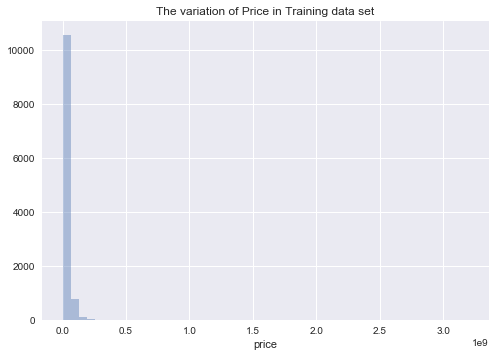

In [30]:
sns.distplot(train.price, kde=False, rug=False)
sns.plt.title('The variation of Price in Training data set')

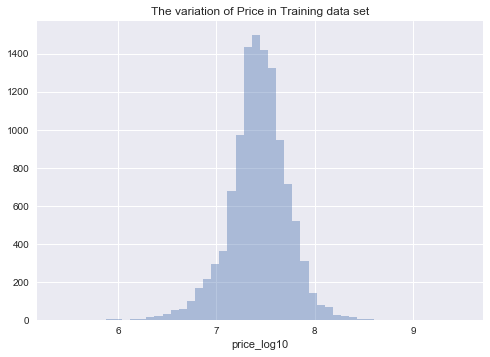

In [32]:
d['price_log10'] = np.log10(d.price)
train['price_log10'] = np.log10(train.price)
sns.distplot(train.price_log10, kde=False, rug=False)
sns.plt.title('The variation of Price in Training data set')

The graph shows the histogram of price in Log 10 scale, and it is symetric and looks normally distributed. We check the distribution of price with other variables.

Price is positively correlated with menseki. The larger the room is the higher the price is. Ekikyori does not look highly correlated with the price as we don't see any trend. When is_reformed = 1, the prices looks slightly higher. 

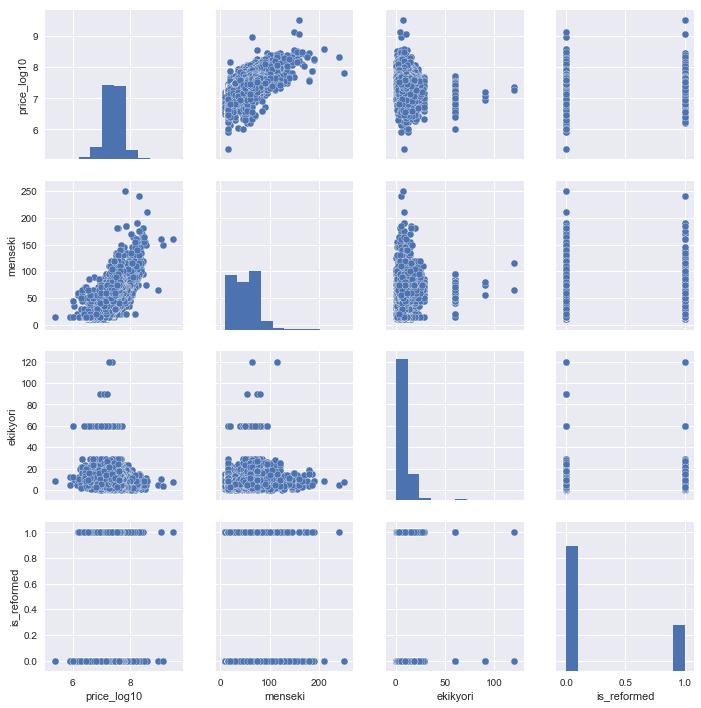

In [40]:
sns.pairplot(train[['price_log10','menseki','ekikyori','is_reformed','madori']])

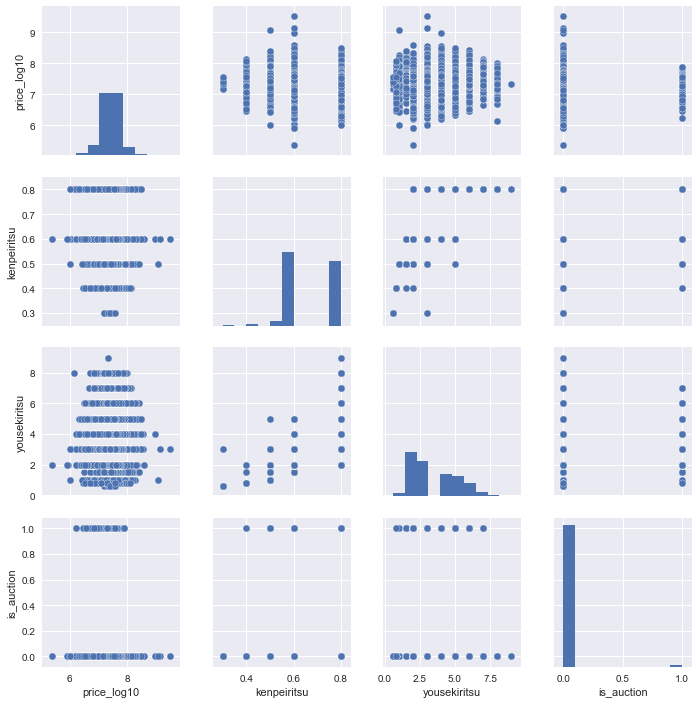

In [41]:
sns.pairplot(train[['price_log10','kouzou','youto','mokuteki','kenpeiritsu','yousekiritsu','bikou','is_auction']])

Kenpeiritsu and Yousekiritsu do not look correlated with the price very much. is_auction does not look correlated with price either, though the variance of the distribution of price is different for is_aucition = 0 and is_aucitin = 1.

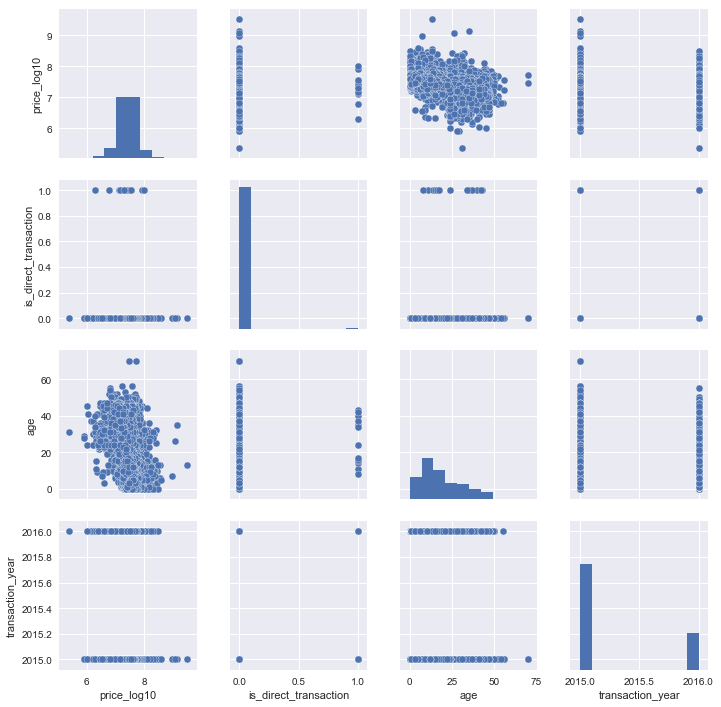

In [42]:
sns.pairplot(train[['price_log10','is_direct_transaction','age','transaction_year']])

A similar observation can be found for is_direct_transaction. It does not correlated but when is_direct = 1, the variation of the price is smaller than that of the price when is_direct = 0. For the transaction year, The price looks lower when the transaction year = 2016 than year 2015. As the age increases (i.e. apartment gets older), the price tends to be lower. 

# Benchmark model
We build a benchmark model by linear regression and calculate the MSE.

In [46]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

predicting_cols = ['menseki','ekikyori','is_reformed','madori','kouzou','youto','mokuteki','kenpeiritsu','yousekiritsu','bikou','is_auction',
                  'is_direct_transaction','age','transaction_year']
lr = linear_model.LinearRegression()

y = train.price_log10
X = train[predicting_cols]

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)


ValueError: could not convert string to float: '改装済を購入'